In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
completed=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride - Apr 22, 2024 - Apr 28, 2024 (1).csv")
completed2=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride Details - Apr 29, 2024 - May 5, 2024 (1).csv")
completed3=pd.read_excel("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride Details.xlsx")
incompleted=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Incomplete Ride Details (Historical) - Apr 1, 2024 - Apr 14, 2024.csv")
incompleted2=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Incomplete Ride Details (Historical) - Apr 15, 2024 - Apr 30, 2024.csv")
incompleted3=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Incomplete Ride Details (Historical) - May 1, 2024 - May 20, 2024.csv")

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_33338/2198419674.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  completed=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride - Apr 22, 2024 - Apr 28, 2024 (1).csv")
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_33338/2198419674.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  completed2=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride Details - Apr 29, 2024 - May 5, 2024 (1).csv")
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_33338/2198419674.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  incompleted=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Incomplete Ride 

In [6]:
incompleted_final = pd.concat([incompleted,incompleted2, incompleted3], ignore_index=True)
completed_final=pd.concat([completed,completed2,completed3],ignore_index=True)
incompleted_final=incompleted_final[['user_id','pickup_lat_long','request_made_at']]
completed_final=completed_final[['user_id','pickup_lat_long','request_made_at']]
dataset=pd.concat([completed_final,incompleted_final],ignore_index=True)

In [7]:
dataset['date_column'] = pd.to_datetime(dataset['request_made_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
dataset['date_column'] = dataset['date_column'].fillna(pd.to_datetime(dataset['request_made_at'], format='%m/%d/%Y %H:%M', errors='coerce'))

In [8]:
import pandas as pd

dataset['date_column'] = pd.to_datetime(dataset['date_column'])

dataset['10min_window'] = dataset['date_column'].dt.floor('10min')

deduped_data = dataset.sort_values(['user_id', 'date_column']).drop_duplicates(['user_id', '10min_window'], keep='first')

dropped_rows = len(dataset) - len(deduped_data)

print(f"Number of rows dropped: {dropped_rows}")
dataset=deduped_data

Number of rows dropped: 124991


In [9]:
from haversine import haversine, Unit
dataset[['latitude', 'longitude']] = dataset['pickup_lat_long'].str.split(',', expand=True)
dataset['latitude'] = dataset['latitude'].astype(float)
dataset['longitude'] = dataset['longitude'].astype(float)

dakshindari= (22.604061, 88.403715)
sector_5=(22.576222, 88.435053)
rabindrasadan_metro=(22.541297, 88.347389)
howrah=(22.583474, 88.342969)
airport=(22.642434, 88.439351)

def calculate_distance(coords,lat, lon):
    point_coords = (lat, lon)
    return haversine(coords, point_coords, unit=Unit.KILOMETERS)

dataset['aerial_dist_dakshindari'] = dataset.apply(
    lambda row: calculate_distance(dakshindari,row['latitude'], row['longitude']), axis=1
)
dataset['aerial_dist_sector_V'] = dataset.apply(
    lambda row: calculate_distance(sector_5,row['latitude'], row['longitude']), axis=1
)
dataset['aerial_dist_rabindrasadan_metro'] = dataset.apply(
    lambda row: calculate_distance(rabindrasadan_metro,row['latitude'], row['longitude']), axis=1
)
dataset['aerial_dist_howrah'] = dataset.apply(
    lambda row: calculate_distance(howrah,row['latitude'], row['longitude']), axis=1
)
dataset['aerial_dist_airport'] = dataset.apply(
    lambda row: calculate_distance(airport,row['latitude'], row['longitude']), axis=1
)

In [10]:
dataset_rabindrasadan=dataset[dataset['aerial_dist_rabindrasadan_metro']<2]
dataset_airport=dataset[dataset['aerial_dist_airport']<2]
dataset_dakshindari=dataset[dataset['aerial_dist_dakshindari']<2]
dataset_howrah=dataset[dataset['aerial_dist_howrah']<2]
dataset_sectorV=dataset[dataset['aerial_dist_sector_V']<2]

In [11]:
dataset_dakshindari.sort_values(by='date_column', inplace=True)

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_33338/1072424562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_dakshindari.sort_values(by='date_column', inplace=True)


In [12]:
baguhati_weather=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Baguihati_20240301_20240529.csv")

In [13]:
baguhati_weather=baguhati_weather.loc[:84230]

In [14]:
baguhati_weather=baguhati_weather.loc[12958:]

In [15]:
baguhati_weather.head()

,city_name,locality_name,device_date_time,rain_intensity,rain_accumulation,humidity,temperature,wind_direction,wind_speed
12958,Kolkata,Baguihati,2024-05-20 23:59:00,0.0,32.0,87.91,28.03,156.6,0.42
12959,Kolkata,Baguihati,2024-05-20 23:58:00,0.0,32.0,87.77,28.05,176.8,0.30
12960,Kolkata,Baguihati,2024-05-20 23:57:00,0.0,32.0,87.73,28.06,168.4,1.06
12961,Kolkata,Baguihati,2024-05-20 23:56:00,0.0,32.0,87.87,28.06,49.4,0.04
12962,Kolkata,Baguihati,2024-05-20 23:55:00,0.0,32.0,87.87,28.06,147.6,0.05


In [16]:
filtered_rows = []
for index, row in baguhati_weather.iterrows():
    if row['device_date_time'].endswith(':00:00'):
        filtered_rows.append(row)

# Create a new DataFrame with the filtered rows
filtered_df = pd.DataFrame(filtered_rows)
print(filtered_df)

      city_name locality_name     device_date_time  rain_intensity  \
13017   Kolkata     Baguihati  2024-05-20 23:00:00             0.0   
13077   Kolkata     Baguihati  2024-05-20 22:00:00             0.0   
13137   Kolkata     Baguihati  2024-05-20 21:00:00             0.0   
13197   Kolkata     Baguihati  2024-05-20 20:00:00             0.0   
13257   Kolkata     Baguihati  2024-05-20 19:00:00             0.0   
...         ...           ...                  ...             ...   
83991   Kolkata     Baguihati  2024-04-01 04:00:00             0.0   
84050   Kolkata     Baguihati  2024-04-01 03:00:00             0.0   
84110   Kolkata     Baguihati  2024-04-01 02:00:00             0.0   
84170   Kolkata     Baguihati  2024-04-01 01:00:00             0.0   
84230   Kolkata     Baguihati  2024-04-01 00:00:00             0.0   

       rain_accumulation  humidity  temperature  wind_direction  wind_speed  
13017               31.8     88.58        27.75           145.1        0.00  
130

In [17]:
filtered_df.head()

,city_name,locality_name,device_date_time,rain_intensity,rain_accumulation,humidity,temperature,wind_direction,wind_speed
13017,Kolkata,Baguihati,2024-05-20 23:00:00,0.0,31.8,88.58,27.75,145.1,0.00
13077,Kolkata,Baguihati,2024-05-20 22:00:00,0.0,31.8,87.67,27.62,184.6,0.06
13137,Kolkata,Baguihati,2024-05-20 21:00:00,0.0,31.8,85.47,27.66,57.7,0.08
13197,Kolkata,Baguihati,2024-05-20 20:00:00,0.0,31.8,82.89,27.80,165.2,0.03
13257,Kolkata,Baguihati,2024-05-20 19:00:00,0.0,31.6,86.17,27.91,163.2,0.03


In [23]:
dataset

,user_id,pickup_lat_long,request_made_at,date_column,10min_window,latitude,longitude,aerial_dist_dakshindari,aerial_dist_sector_V,aerial_dist_rabindrasadan_metro,aerial_dist_howrah,aerial_dist_airport
222501,13117245,"22.587597,88.498335",2024-04-09 15:49:01,2024-04-09 15:49:01,2024-04-09 15:40:00,22.587597,88.498335,9.884657,6.619131,16.332244,15.957581,8.592837
388868,13117245,"22.57818,88.482403",4/20/2024 18:28,2024-04-20 18:28:00,2024-04-20 18:20:00,22.578180,88.482403,8.575646,4.866460,14.457985,14.327888,8.400998
388864,13117245,"22.577507,88.482128",4/23/2024 10:07,2024-04-23 10:07:00,2024-04-23 10:00:00,22.577507,88.482128,8.574555,4.835475,14.409852,14.302988,8.450036
388867,13117245,"22.573576,88.508162",4/23/2024 14:23,2024-04-23 14:23:00,2024-04-23 14:20:00,22.573576,88.508162,11.246063,7.512241,16.895141,16.996441,10.417167
22735,13117245,"22.559161,88.513259",2024-04-23 15:53:55,2024-04-23 15:53:55,2024-04-23 15:50:00,22.559161,88.513259,12.305257,8.251280,17.149202,17.692772,11.970928
...,...,...,...,...,...,...,...,...,...,...,...,...
95770,15726066,"22.643145,88.438739",2024-05-20 23:32:20,2024-05-20 23:32:20,2024-05-20 23:30:00,22.643145,88.438739,5.640037,7.451121,14.703947,11.860130,0.100971
95765,15726075,"22.642925,88.438831",2024-05-20 23:36:38,2024-05-20 23:36:38,2024-05-20 23:30:00,22.642925,88.438831,5.627254,7.427177,14.691152,11.854306,0.076345
95762,15726090,"22.643021,88.438809",2024-05-20 23:42:28,2024-05-20 23:42:28,2024-05-20 23:40:00,22.643021,88.438809,5.634011,7.437720,14.697920,11.858386,0.085757
95759,15726102,"22.643135,88.438738",2024-05-20 23:47:34,2024-05-20 23:47:34,2024-05-20 23:40:00,22.643135,88.438738,5.639115,7.450005,14.703025,11.859423,0.100167


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415743 entries, 222501 to 95752
Data columns (total 12 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   user_id                          415743 non-null  int64         
 1   pickup_lat_long                  415743 non-null  object        
 2   request_made_at                  415743 non-null  object        
 3   date_column                      415743 non-null  datetime64[ns]
 4   10min_window                     415743 non-null  datetime64[ns]
 5   latitude                         415743 non-null  float64       
 6   longitude                        415743 non-null  float64       
 7   aerial_dist_dakshindari          415743 non-null  float64       
 8   aerial_dist_sector_V             415743 non-null  float64       
 9   aerial_dist_rabindrasadan_metro  415743 non-null  float64       
 10  aerial_dist_howrah               415743 non-n

In [25]:
dataset['date'] = dataset['date_column'].dt.date
dataset['hour'] = dataset['date_column'].dt.hour
hourly_demand = dataset.groupby(['date', 'hour']).size().reset_index(name='y')
hourly_demand['ds'] = hourly_demand.apply(lambda row: datetime.combine(row['date'], datetime.min.time()) + timedelta(hours=row['hour']), axis=1)
hourly_demand = hourly_demand.drop(columns=['date', 'hour'])
hourly_demand['ds'] = pd.to_datetime(hourly_demand['ds'])

all_hours = pd.date_range(start=hourly_demand['ds'].min(), end=hourly_demand['ds'].max(), freq='H')

# Reindex the hourly_demand dataframe with the all_hours range
hourly_demand = hourly_demand.set_index('ds').reindex(all_hours, fill_value=0).reset_index()

In [26]:
hourly_demand

,index,y
0,2024-04-01 00:00:00,64
1,2024-04-01 01:00:00,17
2,2024-04-01 02:00:00,9
3,2024-04-01 03:00:00,21
4,2024-04-01 04:00:00,23
...,...,...
1195,2024-05-20 19:00:00,552
1196,2024-05-20 20:00:00,370
1197,2024-05-20 21:00:00,300
1198,2024-05-20 22:00:00,135


In [18]:
baguhati_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71273 entries, 12958 to 84230
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_name          71273 non-null  object 
 1   locality_name      71273 non-null  object 
 2   device_date_time   71273 non-null  object 
 3   rain_intensity     71273 non-null  float64
 4   rain_accumulation  71273 non-null  float64
 5   humidity           71273 non-null  float64
 6   temperature        71273 non-null  float64
 7   wind_direction     71273 non-null  float64
 8   wind_speed         71273 non-null  float64
dtypes: float64(6), object(3)
memory usage: 4.9+ MB


In [19]:
from datetime import datetime, timedelta

dataset_dakshindari['date'] = dataset_dakshindari['date_column'].dt.date
dataset_dakshindari['hour'] = dataset_dakshindari['date_column'].dt.hour

hourly_demand = dataset_dakshindari.groupby(['date', 'hour']).size().reset_index(name='y')

hourly_demand['ds'] = hourly_demand.apply(lambda row: datetime.combine(row['date'], datetime.min.time()) + timedelta(hours=row['hour']), axis=1)

hourly_demand = hourly_demand.drop(columns=['date', 'hour'])

hourly_demand['ds'] = pd.to_datetime(hourly_demand['ds'])

print("Hourly Demand Data:")
print(hourly_demand.head())
print(hourly_demand.info())

Hourly Demand Data:
   y                  ds
0  4 2024-04-01 00:00:00
1  3 2024-04-01 01:00:00
2  1 2024-04-01 03:00:00
3  6 2024-04-01 04:00:00
4  3 2024-04-01 06:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       1124 non-null   int64         
 1   ds      1124 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.7 KB
None


/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_33338/1702966912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_dakshindari['date'] = dataset_dakshindari['date_column'].dt.date
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_33338/1702966912.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_dakshindari['hour'] = dataset_dakshindari['date_column'].dt.hour


In [20]:
baguhati_weather['ds']=baguhati_weather['device_date_time']

In [21]:
start_date = hourly_demand['ds'].min()
end_date = start_date + pd.Timedelta(hours=1199)
complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')

# Create a DataFrame with the complete date range
complete_hourly_demand = pd.DataFrame({'ds': complete_date_range})

# Merge the complete date range DataFrame with the original DataFrame
merged_hourly_demand = complete_hourly_demand.merge(hourly_demand, on='ds', how='left')

# Fill missing 'y' values with 0
merged_hourly_demand['y'].fillna(0, inplace=True)

# Ensure the 'y' column is of integer type
merged_hourly_demand['y'] = merged_hourly_demand['y'].astype(int)

print(merged_hourly_demand)

                      ds   y
0    2024-04-01 00:00:00   4
1    2024-04-01 01:00:00   3
2    2024-04-01 02:00:00   0
3    2024-04-01 03:00:00   1
4    2024-04-01 04:00:00   6
...                  ...  ..
1195 2024-05-20 19:00:00  32
1196 2024-05-20 20:00:00  28
1197 2024-05-20 21:00:00  25
1198 2024-05-20 22:00:00  12
1199 2024-05-20 23:00:00   8

[1200 rows x 2 columns]


left join. based on date and hour.

In [27]:
dataset_sectorV['date'] = dataset_sectorV['date_column'].dt.date
dataset_sectorV['hour'] = dataset_sectorV['date_column'].dt.hour
hourly_demand_sectorV = dataset_sectorV.groupby(['date', 'hour']).size().reset_index(name='y')
hourly_demand_sectorV['ds'] = hourly_demand_sectorV.apply(lambda row: datetime.combine(row['date'], datetime.min.time()) + timedelta(hours=row['hour']), axis=1)
hourly_demand_sectorV = hourly_demand_sectorV.drop(columns=['date', 'hour'])
hourly_demand_sectorV['ds'] = pd.to_datetime(hourly_demand_sectorV['ds'])

all_hours = pd.date_range(start=hourly_demand_sectorV['ds'].min(), end=hourly_demand_sectorV['ds'].max(), freq='H')
hourly_demand_sectorV = hourly_demand_sectorV.set_index('ds').reindex(all_hours, fill_value=0).reset_index()
hourly_demand_sectorV = hourly_demand_sectorV.rename(columns={'index': 'ds'})

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_33338/2549200651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_sectorV['date'] = dataset_sectorV['date_column'].dt.date
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_33338/2549200651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_sectorV['hour'] = dataset_sectorV['date_column'].dt.hour


In [28]:
hourly_demand_sectorV

,ds,y
0,2024-04-01 00:00:00,2
1,2024-04-01 01:00:00,0
2,2024-04-01 02:00:00,3
3,2024-04-01 03:00:00,0
4,2024-04-01 04:00:00,0
...,...,...
1195,2024-05-20 19:00:00,104
1196,2024-05-20 20:00:00,33
1197,2024-05-20 21:00:00,26
1198,2024-05-20 22:00:00,12


In [ ]:
baguhati_weather['ds']=pd.to_datetime(baguhati_weather['ds'])

KeyboardInterrupt: 

In [ ]:
#left_df.merge(right_df, on='user_id', how='left')
merged_hourly_demand = merged_hourly_demand.merge(baguhati_weather, on='ds', how='left')


In [ ]:
merged_hourly_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ds                 1200 non-null   datetime64[ns]
 1   y                  1200 non-null   int64         
 2   city_name          1188 non-null   object        
 3   locality_name      1188 non-null   object        
 4   device_date_time   1188 non-null   object        
 5   rain_intensity     1188 non-null   float64       
 6   rain_accumulation  1188 non-null   float64       
 7   humidity           1188 non-null   float64       
 8   temperature        1188 non-null   float64       
 9   wind_direction     1188 non-null   float64       
 10  wind_speed         1188 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 103.2+ KB


In [ ]:
merged_hourly_demand.to_excel("hourly_demand.xlsx",index=True)

In [ ]:
hourly_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       1124 non-null   int64         
 1   ds      1124 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.7 KB


In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

# Load data
data = pd.read_csv('/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/hourly_demand.csv')
#data = data.set_index('datetime')


In [ ]:
data = data[['ds','y','rain_intensity','rain_accumulation','temperature']]
data['ds']=pd.to_datetime(data['ds'])
data=data.set_index('ds')

In [ ]:
dataset['date'] = dataset['bookingDateTimestamp'].dt.date
dataset['hour'] = dataset['bookingDateTimestamp'].dt.hour
hourly_demand = dataset.groupby(['date', 'hour']).size().reset_index(name='y')
hourly_demand['ds'] = hourly_demand.apply(lambda row: datetime.combine(row['date'], datetime.min.time()) + timedelta(hours=row['hour']), axis=1)
hourly_demand = hourly_demand.drop(columns=['date', 'hour'])
hourly_demand['ds'] = pd.to_datetime(hourly_demand['ds'])

# Create a range of all possible hours
all_hours = pd.date_range(start=hourly_demand['ds'].min(), end=hourly_demand['ds'].max(), freq='H')

# Reindex the hourly_demand dataframe with the all_hours range
hourly_demand = hourly_demand.set_index('ds').reindex(all_hours, fill_value=0).reset_index()

# Rename the index column to 'ds'
hourly_demand = hourly_demand.rename(columns={'index': 'ds'})
############ Airport #########

In [29]:
dataset_dakshindari['date'] = dataset_dakshindari['date_column'].dt.date
dataset_dakshindari['hour'] = dataset_dakshindari['date_column'].dt.hour
hourly_demand_dakshinDari = dataset_dakshindari.groupby(['date', 'hour']).size().reset_index(name='y')
hourly_demand_dakshinDari['ds'] = hourly_demand_dakshinDari.apply(lambda row: datetime.combine(row['date'], datetime.min.time()) + timedelta(hours=row['hour']), axis=1)
hourly_demand_dakshinDari = hourly_demand_dakshinDari.drop(columns=['date', 'hour'])
hourly_demand_dakshinDari['ds'] = pd.to_datetime(hourly_demand_dakshinDari['ds'])

all_hours = pd.date_range(start=hourly_demand_dakshinDari['ds'].min(), end=hourly_demand_dakshinDari['ds'].max(), freq='H')
hourly_demand_dakshinDari = hourly_demand_dakshinDari.set_index('ds').reindex(all_hours, fill_value=0).reset_index()
hourly_demand_dakshinDari = hourly_demand_dakshinDari.rename(columns={'index': 'ds'})

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_33338/2442760448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_dakshindari['date'] = dataset_dakshindari['date_column'].dt.date
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_33338/2442760448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_dakshindari['hour'] = dataset_dakshindari['date_column'].dt.hour


In [30]:
hourly_demand_dakshinDari.head()

,ds,y
0,2024-04-01 00:00:00,4
1,2024-04-01 01:00:00,3
2,2024-04-01 02:00:00,0
3,2024-04-01 03:00:00,1
4,2024-04-01 04:00:00,6


In [31]:
hourly_demand_dakshinDari = hourly_demand_dakshinDari.set_index('ds')


In [32]:
df.head()

,y
ds,
2024-04-01 00:00:00,4
2024-04-01 01:00:00,3
2024-04-01 02:00:00,0
2024-04-01 03:00:00,1
2024-04-01 04:00:00,6


In [ ]:
data.head()

,y,rain_intensity,rain_accumulation,temperature
ds,,,,
2024-04-01 00:00:00,4,0.0,0.0,29.81
2024-04-01 01:00:00,3,0.0,0.0,29.74
2024-04-01 02:00:00,0,0.0,0.0,29.64
2024-04-01 03:00:00,1,0.0,0.0,29.44
2024-04-01 04:00:00,6,0.0,0.0,29.27


In [ ]:
for lag in [1, 8, 12, 24]:
    data[f'lag_{lag}'] = data['y'].shift(lag)

In [ ]:
import numpy as np

def create_sequences(data, time_steps):
    """
    Creates sequences of data for time series prediction.
    
    Parameters:
    - data: The input data, a 2D numpy array or pandas DataFrame.
    - time_steps: The number of time steps to look back for each sequence.
    
    Returns:
    - X: Input features for the model.
    - y: Target values for the model.
    """
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)



<Axes: title={'center': 'Hourly Ride Request/ DakshinDari'}, xlabel='ds'>

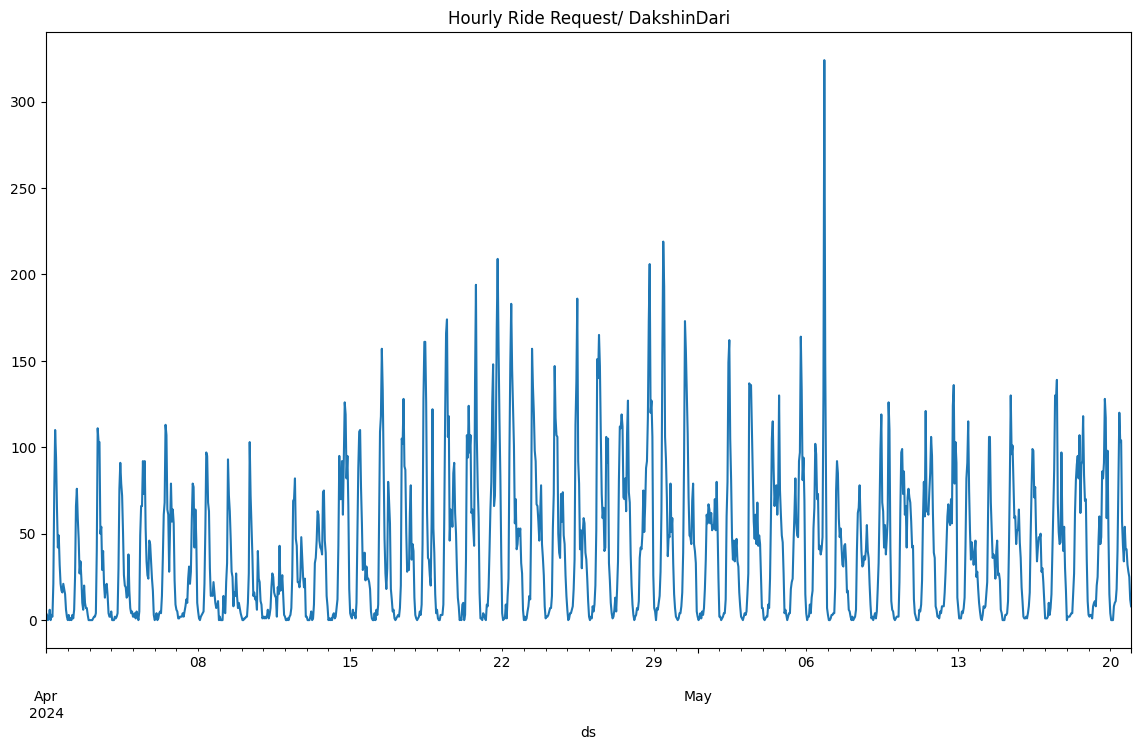

In [ ]:
data['y'].plot(figsize=(14, 8), title='Hourly Ride Request/ DakshinDari')


<Axes: title={'center': 'Hourly Rain Accumulation/ Baguhati'}, xlabel='ds'>

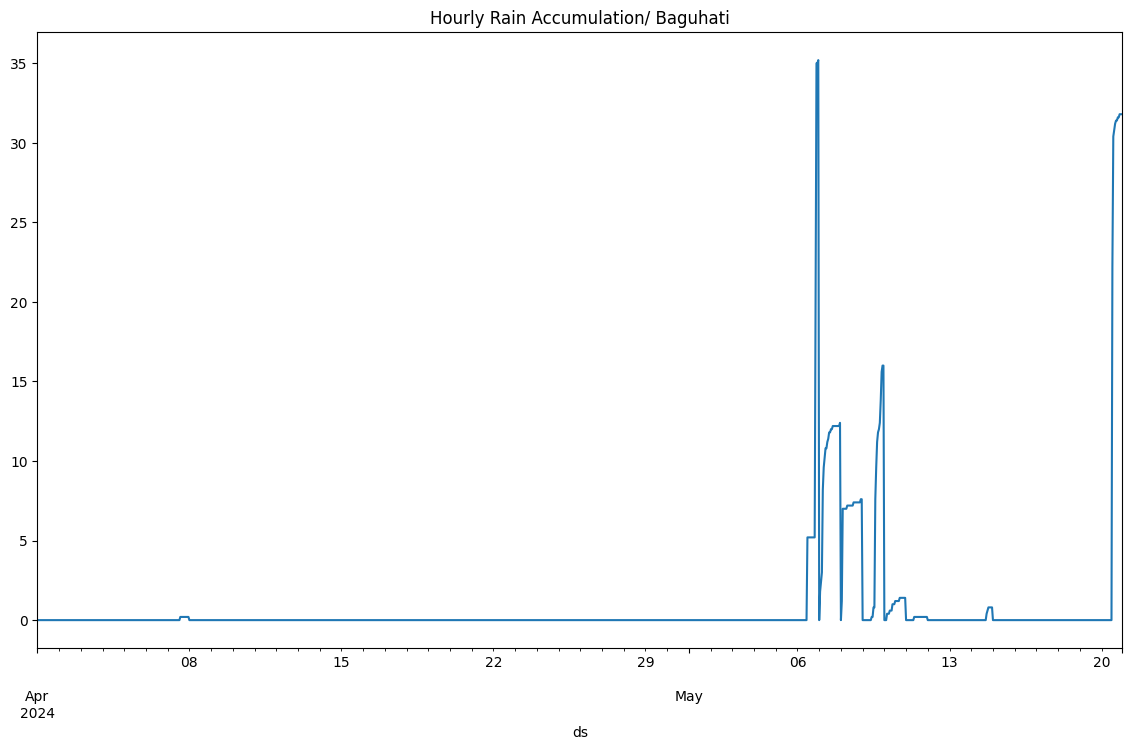

In [ ]:
data['rain_accumulation'].plot(figsize=(14, 8), title='Hourly Rain Accumulation/ Baguhati')


<Axes: title={'center': 'Hourly Rain Intensity/ Baguhati'}, xlabel='ds'>

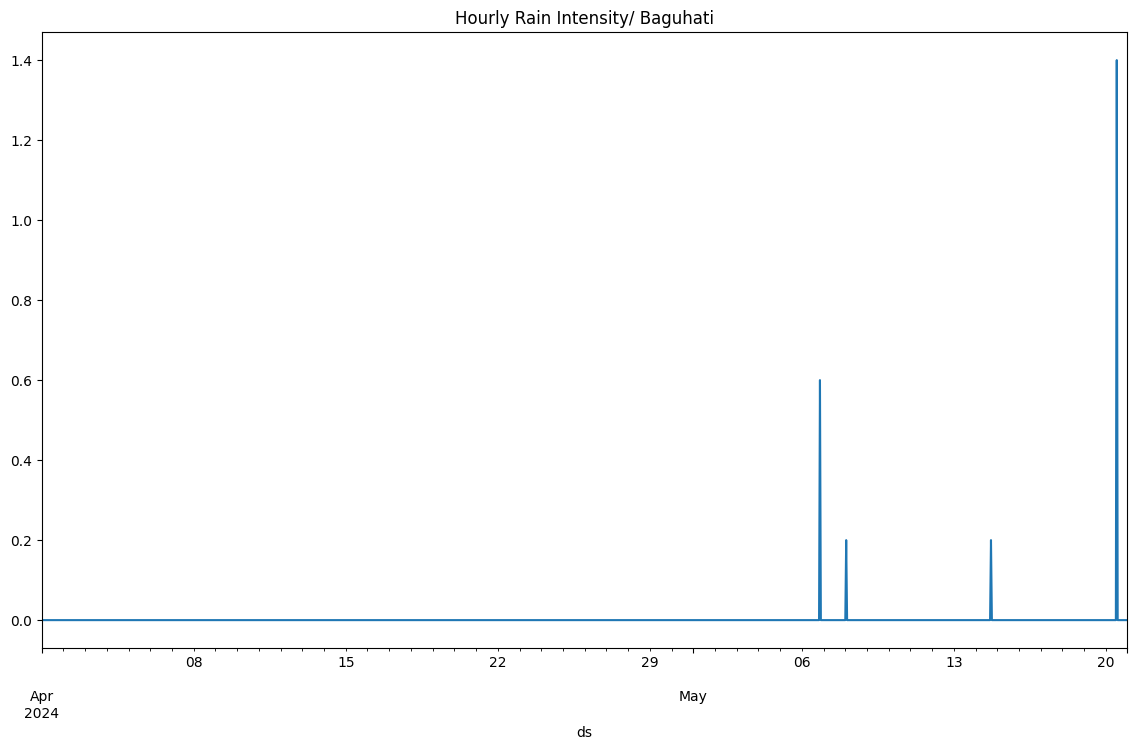

In [ ]:
data['rain_intensity'].plot(figsize=(14, 8), title='Hourly Rain Intensity/ Baguhati')


<Axes: title={'center': 'Hourly Temperature/ Baguhati'}, xlabel='ds'>

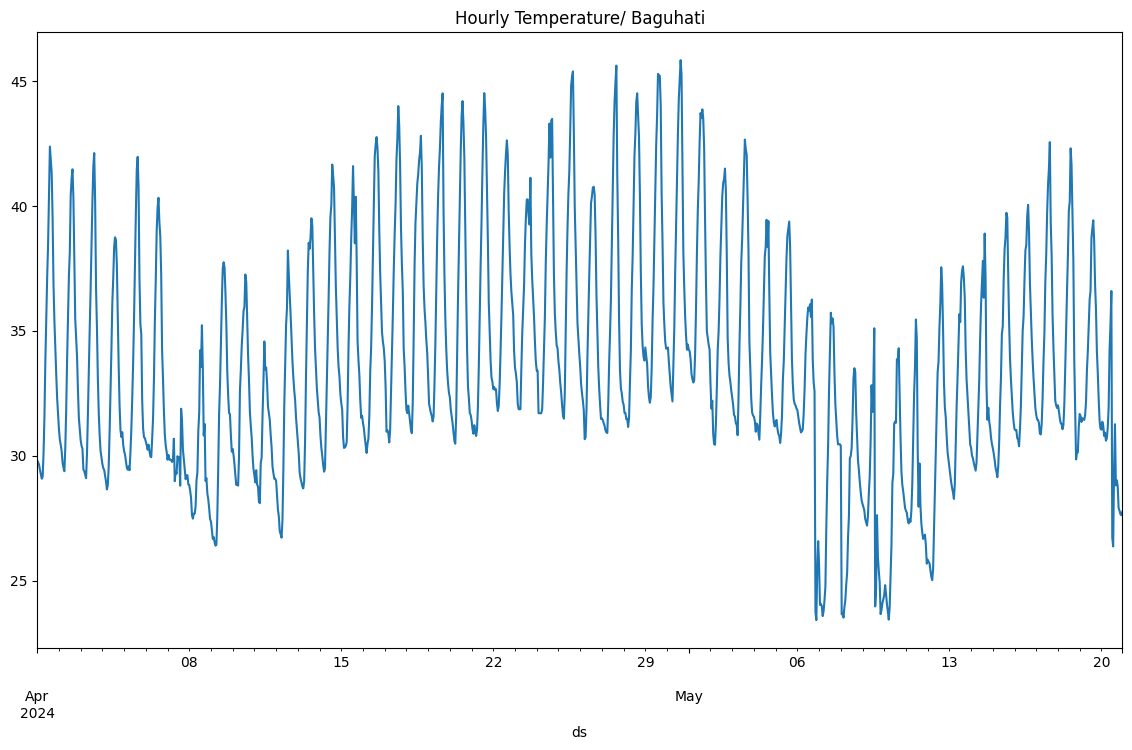

In [ ]:
data['temperature'].plot(figsize=(14, 8), title='Hourly Temperature/ Baguhati')


In [ ]:
data= data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1176 entries, 2024-04-02 00:00:00 to 2024-05-20 23:00:00
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   y                  1176 non-null   int64  
 1   rain_intensity     1176 non-null   float64
 2   rain_accumulation  1176 non-null   float64
 3   temperature        1176 non-null   float64
 4   lag_1              1176 non-null   float64
 5   lag_8              1176 non-null   float64
 6   lag_12             1176 non-null   float64
 7   lag_24             1176 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 82.7 KB


In [ ]:

train_data = data[:"2024-05-10 00:00:00"]
test_data = data["2024-05-10 00:01:00":]

# Normalize data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

TIME_STEPS = 24  
X_train, y_train = create_sequences(train_data_scaled, TIME_STEPS)
X_test, y_test = create_sequences(test_data_scaled, TIME_STEPS)

# Define LSTM model
model = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(TIME_STEPS, X_train.shape[2])),
    keras.layers.Dense(1)
])

# Train the model
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/100
28/28 [==============================] - 4s 70ms/step - loss: 0.0363 - val_loss: 0.0305
Epoch 2/100
28/28 [==============================] - 1s 25ms/step - loss: 0.0338 - val_loss: 0.0299
Epoch 3/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0335 - val_loss: 0.0299
Epoch 4/100
28/28 [==============================] - 0s 17ms/step - loss: 0.0333 - val_loss: 0.0298
Epoch 5/100
28/28 [==============================] - 0s 13ms/step - loss: 0.0332 - val_loss: 0.0297
Epoch 6/100
28/28 [==============================] - 0s 17ms/step - loss: 0.0331 - val_loss: 0.0296
Epoch 7/100
28/28 [==============================] - 1s 20ms/step - loss: 0.0330 - val_loss: 0.0297
Epoch 8/100
28/28 [==============================] - 1s 24ms/step - loss: 0.0330 - val_loss: 0.0296
Epoch 9/100
28/28 [==============================] - 1s 29ms/step - loss: 0.0329 - val_loss: 0.0296
Epoch 10/100
28/28 [==============================] - 1s 23ms/step - loss: 0.0329 - val_loss: 0.0296

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                18688     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 18753 (73.25 KB)
Trainable params: 18753 (73.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
forecasts = []
for i in range(len(test_data)):
    X_input = test_data_scaled[i:i+TIME_STEPS].reshape(1, TIME_STEPS, X_train.shape[2])
    forecast = model.predict(X_input)[0][0]
    forecasts.append(forecast)

# Inverse transform forecasts
forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

1/1 [==============================] - 0s 16ms/step


ValueError: cannot reshape array of size 184 into shape (1,24,8)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Split data into train and test sets
train_data = data[:'2024-05-10 00:00:00']
test_data = data['2024-05-10 00:01:00':]

# Normalize data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
TIME_STEPS = 24
N_FEATURES = train_data_scaled.shape[1] - 1  # Excluding the target variable 'y'

# Create input and target sequences for train and test data
def create_sequences(data, time_steps=TIME_STEPS):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, :-1])  # Input sequence (excluding target)
        y.append(data[i+time_steps, 0])  # Target variable ('y')
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data_scaled)
X_test, y_test = create_sequences(test_data_scaled)

# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], TIME_STEPS, N_FEATURES)
X_test = X_test.reshape(X_test.shape[0], TIME_STEPS, N_FEATURES)

# Build the LSTM model
'''model = Sequential()
model.add(LSTM(64, input_shape=(TIME_STEPS, N_FEATURES)))
model.add(Dense(1))'''
model = Sequential()
model.add(LSTM(64, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))  # Added another LSTM layer
model.add(Dropout(0.2))  # Added a Dropout layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred = model.predict(X_test)

Epoch 1/100
28/28 [==============================] - 16s 196ms/step - loss: 0.0216 - val_loss: 0.0097
Epoch 2/100
28/28 [==============================] - 1s 27ms/step - loss: 0.0133 - val_loss: 0.0063
Epoch 3/100
28/28 [==============================] - 1s 18ms/step - loss: 0.0122 - val_loss: 0.0061
Epoch 4/100
28/28 [==============================] - 1s 24ms/step - loss: 0.0115 - val_loss: 0.0060
Epoch 5/100
28/28 [==============================] - 1s 26ms/step - loss: 0.0111 - val_loss: 0.0061
Epoch 6/100
28/28 [==============================] - 1s 23ms/step - loss: 0.0109 - val_loss: 0.0058
Epoch 7/100
28/28 [==============================] - 1s 19ms/step - loss: 0.0105 - val_loss: 0.0055
Epoch 8/100
28/28 [==============================] - 0s 18ms/step - loss: 0.0098 - val_loss: 0.0054
Epoch 9/100
28/28 [==============================] - 1s 20ms/step - loss: 0.0098 - val_loss: 0.0052
Epoch 10/100
28/28 [==============================] - 1s 19ms/step - loss: 0.0093 - val_loss: 0.00

In [ ]:
model.save('trained_lstm_model.h5')


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Get the minimum and maximum values for the target variable ('y')
y_min = scaler.data_min_[0]  # Assuming 'y' is the first column
y_max = scaler.data_max_[0]  # Assuming 'y' is the first column

# Inverse transform predictions to original scale
y_pred_original = y_pred * (y_max - y_min) + y_min

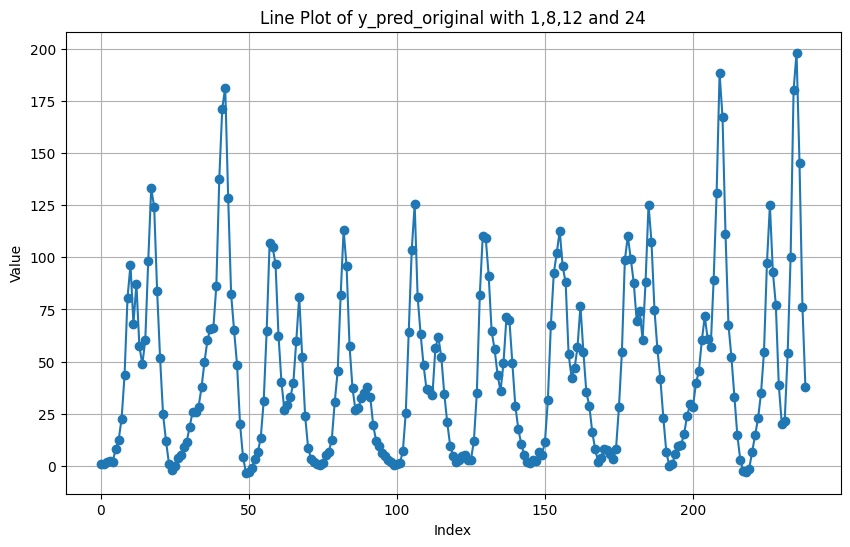

In [ ]:
y_pred_original = y_pred_original.flatten()

# Plotting the y_pred_original
plt.figure(figsize=(10, 6))
plt.plot(y_pred_original, marker='o')
plt.title('Line Plot of y_pred_original with 1,8,12 and 24')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [ ]:
y_test_original = y_test * (y_max - y_min) + y_min
y_test_original_slit=y_test_original[0:200]
y_pred_original_slit=y_pred_original[0:200]
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_original_slit, y_pred_original_slit)

print("Mean Squared Error:", mse)

import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_original_slit, y_pred_original_slit))

print("Root Mean Squared Error:", rmse)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_original_slit, y_pred_original_slit)

print("Mean Absolute Error:", mae)

from sklearn.metrics import r2_score

r2 = r2_score(y_test_original_slit, y_pred_original_slit)

print("R-squared Score:", r2)

Mean Squared Error: 270.1911630957256
Root Mean Squared Error: 16.4374926036706
Mean Absolute Error: 11.3690488037467
R-squared Score: 0.7980685936445201


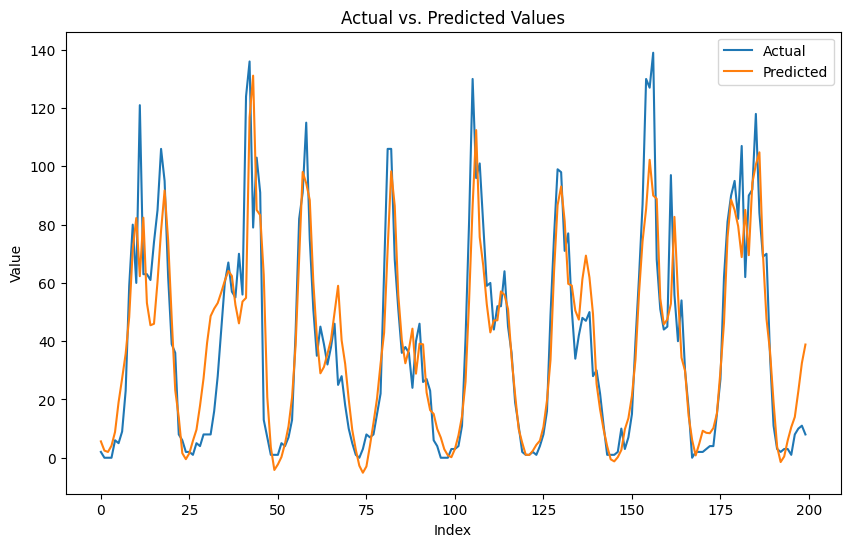

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(y_test_original_slit, label='Actual')
plt.plot(y_pred_original_slit, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test_original_slit, y_pred_original_slit)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(y_test_original_slit, y_pred_original_slit))
print("Root Mean Squared Error:", rmse)
mae = mean_absolute_error(y_test_original_slit, y_pred_original_slit)
print("Mean Absolute Error:", mae)
r2 = r2_score(y_test_original_slit, y_pred_original_slit)
print("R-squared Score:", r2)

Mean Squared Error: 258.2330662541332
Root Mean Squared Error: 16.069631802071047
Mean Absolute Error: 10.656744022704661
R-squared Score: 0.8070056561483085


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1176 entries, 2024-04-02 00:00:00 to 2024-05-20 23:00:00
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   y                  1176 non-null   int64  
 1   rain_intensity     1176 non-null   float64
 2   rain_accumulation  1176 non-null   float64
 3   temperature        1176 non-null   float64
 4   lag_1              1176 non-null   float64
 5   lag_8              1176 non-null   float64
 6   lag_12             1176 non-null   float64
 7   lag_24             1176 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 115.0 KB


In [ ]:
data_without_12=data.drop('lag_12',axis=1)

database connection.
representation dashboard.
whatsapp bot.


In [ ]:
test_data

,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24
ds,,,,,,,,
2024-05-10 01:00:00,1,0.0,0.0,24.82,5.0,47.0,63.0,2.0
2024-05-10 02:00:00,0,0.0,0.0,24.47,1.0,58.0,42.0,0.0
2024-05-10 03:00:00,1,0.0,0.4,24.06,0.0,126.0,55.0,2.0
2024-05-10 04:00:00,2,0.0,0.4,23.77,1.0,110.0,38.0,4.0
2024-05-10 05:00:00,2,0.0,0.4,23.44,2.0,42.0,47.0,1.0
...,...,...,...,...,...,...,...,...
2024-05-20 19:00:00,32,0.0,31.6,27.91,41.0,103.0,18.0,117.0
2024-05-20 20:00:00,28,0.0,31.8,27.80,32.0,104.0,40.0,59.0
2024-05-20 21:00:00,25,0.0,31.8,27.66,28.0,57.0,78.0,98.0


In [ ]:


train_data = data[:'2024-05-10 00:00:00']
test_data = data['2024-05-10 00:01:00':]

# Normalize data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
TIME_STEPS = 24
N_FEATURES = train_data_scaled.shape[1] - 1  # Excluding the target variable 'y'

# Create input and target sequences for train and test data
def create_sequences(data, time_steps=TIME_STEPS):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, :-1])  # Input sequence (excluding target)
        y.append(data[i+time_steps, 0])  # Target variable ('y')
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data_scaled)
X_test, y_test = create_sequences(test_data_scaled)

# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], TIME_STEPS, N_FEATURES)
X_test = X_test.reshape(X_test.shape[0], TIME_STEPS, N_FEATURES)

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(TIME_STEPS, N_FEATURES)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred = model.predict(X_test)

# Inverse transform predictions to original scale
#y_pred_original = scaler.inverse_transform(y_pred)
# Get the minimum and maximum values for the target variable ('y')


Epoch 1/100
28/28 [==============================] - 2s 34ms/step - loss: 0.0147 - val_loss: 0.0071
Epoch 2/100
28/28 [==============================] - 0s 12ms/step - loss: 0.0110 - val_loss: 0.0064
Epoch 3/100
28/28 [==============================] - 0s 12ms/step - loss: 0.0102 - val_loss: 0.0065
Epoch 4/100
28/28 [==============================] - 0s 14ms/step - loss: 0.0088 - val_loss: 0.0053
Epoch 5/100
28/28 [==============================] - 0s 14ms/step - loss: 0.0080 - val_loss: 0.0054
Epoch 6/100
28/28 [==============================] - 1s 26ms/step - loss: 0.0074 - val_loss: 0.0051
Epoch 7/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0070 - val_loss: 0.0052
Epoch 8/100
28/28 [==============================] - 0s 14ms/step - loss: 0.0072 - val_loss: 0.0041
Epoch 9/100
28/28 [==============================] - 0s 13ms/step - loss: 0.0065 - val_loss: 0.0038
Epoch 10/100
28/28 [==============================] - 0s 14ms/step - loss: 0.0059 - val_loss: 0.0038

In [ ]:
X_test[[0]]

array([[[0.00308642, 0.        , 0.        , 0.06247211, 0.0154321 ,
         0.14506173, 0.19444444],
        [0.        , 0.        , 0.        , 0.04685408, 0.00308642,
         0.17901235, 0.12962963],
        [0.00308642, 0.        , 0.01136364, 0.02855868, 0.        ,
         0.38888889, 0.16975309],
        [0.00617284, 0.        , 0.01136364, 0.01561803, 0.00308642,
         0.33950617, 0.11728395],
        [0.00617284, 0.        , 0.01136364, 0.00089246, 0.00617284,
         0.12962963, 0.14506173],
        [0.00617284, 0.        , 0.01704545, 0.0227577 , 0.00617284,
         0.03395062, 0.17901235],
        [0.06790123, 0.        , 0.01704545, 0.07942883, 0.00617284,
         0.01851852, 0.38888889],
        [0.19753086, 0.        , 0.01704545, 0.13386881, 0.06790123,
         0.0154321 , 0.33950617],
        [0.29938272, 0.        , 0.02840909, 0.24453369, 0.19753086,
         0.00308642, 0.12962963],
        [0.30555556, 0.        , 0.02840909, 0.26104418, 0.29938272,
    

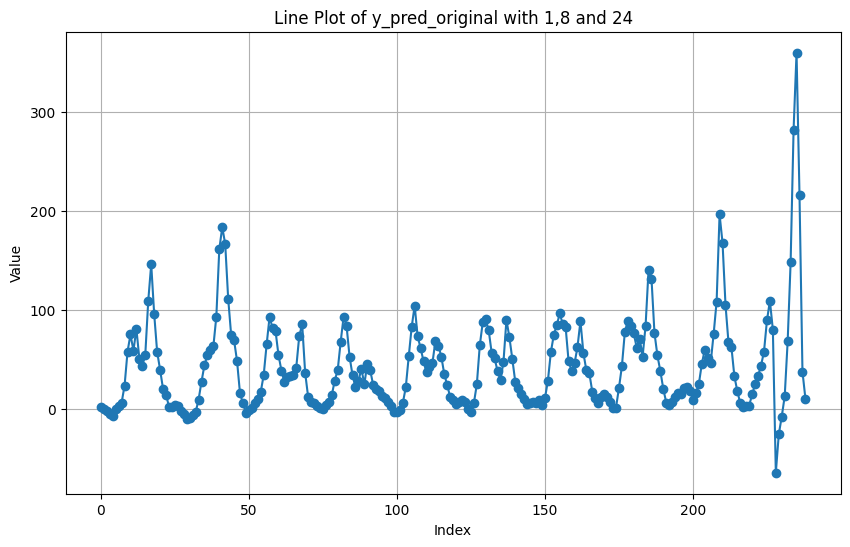

In [ ]:
y_min = scaler.data_min_[0]  # Assuming 'y' is the first column
y_max = scaler.data_max_[0]  # Assuming 'y' is the first column

# Inverse transform predictions to original scale
y_pred_original = y_pred * (y_max - y_min) + y_min

y_pred_original = y_pred_original.flatten()

# Plotting the y_pred_original
plt.figure(figsize=(10, 6))
plt.plot(y_pred_original, marker='o')
plt.title('Line Plot of y_pred_original with 1,8 and 24')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

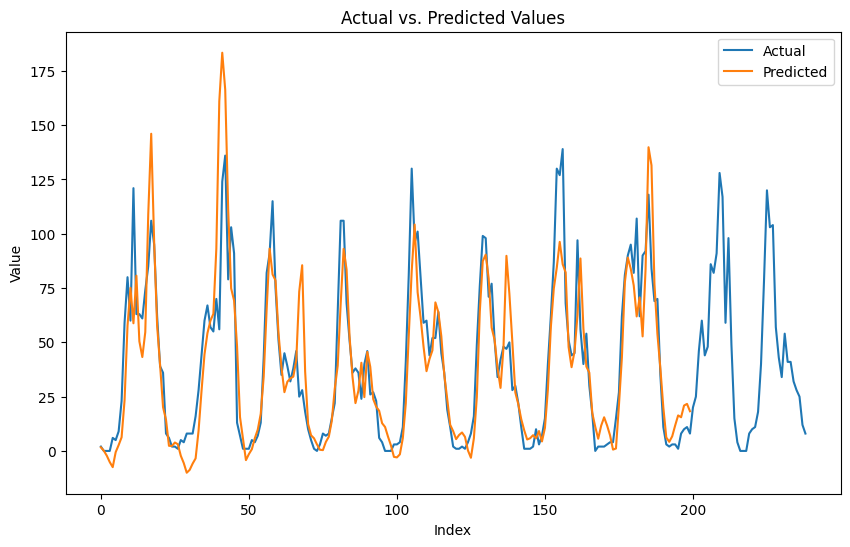

In [ ]:
import matplotlib.pyplot as plt

y_test_original_slit = y_test * (y_max - y_min) + y_min

plt.figure(figsize=(10, 6))
plt.plot(y_test_original_slit, label='Actual')
plt.plot(y_pred_original_slit, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
y_test_original_slit=y_test_original[0:200]
y_pred_original_slit=y_pred_original[0:200]
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_original_slit, y_pred_original_slit)

print("Mean Squared Error:", mse)

import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_original_slit, y_pred_original_slit))

print("Root Mean Squared Error:", rmse)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_original_slit, y_pred_original_slit)

print("Mean Absolute Error:", mae)

from sklearn.metrics import r2_score

r2 = r2_score(y_test_original_slit, y_pred_original_slit)

print("R-squared Score:", r2)

Mean Squared Error: 364.87938240570077
Root Mean Squared Error: 19.101816206991963
Mean Absolute Error: 12.851670908071101
R-squared Score: 0.7273019369134663


32,0.5,50,32
{'model__units': 100, 'epochs': 50, 'batch_size': 20}

In [ ]:
data.head()

,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24
ds,,,,,,,,
2024-04-02 00:00:00,0,0.0,0.0,31.06,2.0,21.0,65.0,4.0
2024-04-02 01:00:00,3,0.0,0.0,30.64,0.0,17.0,42.0,3.0
2024-04-02 02:00:00,0,0.0,0.0,30.43,3.0,16.0,49.0,0.0
2024-04-02 03:00:00,1,0.0,0.0,30.18,0.0,21.0,32.0,1.0
2024-04-02 04:00:00,0,0.0,0.0,29.72,1.0,18.0,21.0,6.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Split data into train and test sets
train_data = data[:'2024-05-10 00:00:00']
test_data = data['2024-05-10 00:01:00':]

# Normalize data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
TIME_STEPS = 24
N_FEATURES = train_data_scaled.shape[1] - 1  # Excluding the target variable 'y'

# Create input and target sequences for train and test data
def create_sequences(data, time_steps=TIME_STEPS):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, :-1])  # Input sequence (excluding target)
        y.append(data[i+time_steps, 0])  # Target variable ('y')
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data_scaled)
X_test, y_test = create_sequences(test_data_scaled)

# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], TIME_STEPS, N_FEATURES)
X_test = X_test.reshape(X_test.shape[0], TIME_STEPS, N_FEATURES)

# Build the LSTM model
'''model = Sequential()
model.add(LSTM(64, input_shape=(TIME_STEPS, N_FEATURES)))
model.add(Dense(1))'''
model = Sequential()
model.add(LSTM(100, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(50))  # Added another LSTM layer
#model.add(LSTM(16))
model.add(Dropout(0.5))  # Added a Dropout layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=20, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred = model.predict(X_test)

Epoch 1/50
45/45 [==============================] - 8s 81ms/step - loss: 0.0172 - val_loss: 0.0063
Epoch 2/50
45/45 [==============================] - 1s 20ms/step - loss: 0.0124 - val_loss: 0.0062
Epoch 3/50
45/45 [==============================] - 1s 17ms/step - loss: 0.0117 - val_loss: 0.0063
Epoch 4/50
45/45 [==============================] - 1s 19ms/step - loss: 0.0112 - val_loss: 0.0056
Epoch 5/50
45/45 [==============================] - 1s 18ms/step - loss: 0.0102 - val_loss: 0.0053
Epoch 6/50
45/45 [==============================] - 1s 17ms/step - loss: 0.0098 - val_loss: 0.0048
Epoch 7/50
45/45 [==============================] - 1s 19ms/step - loss: 0.0087 - val_loss: 0.0050
Epoch 8/50
45/45 [==============================] - 1s 17ms/step - loss: 0.0085 - val_loss: 0.0044
Epoch 9/50
45/45 [==============================] - 1s 18ms/step - loss: 0.0079 - val_loss: 0.0043
Epoch 10/50
45/45 [==============================] - 1s 21ms/step - loss: 0.0075 - val_loss: 0.0042
Epoch 11/

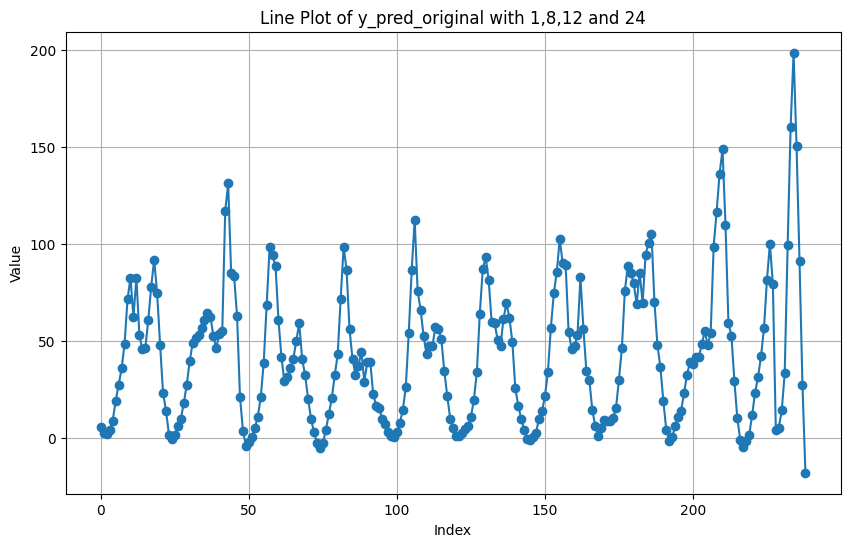

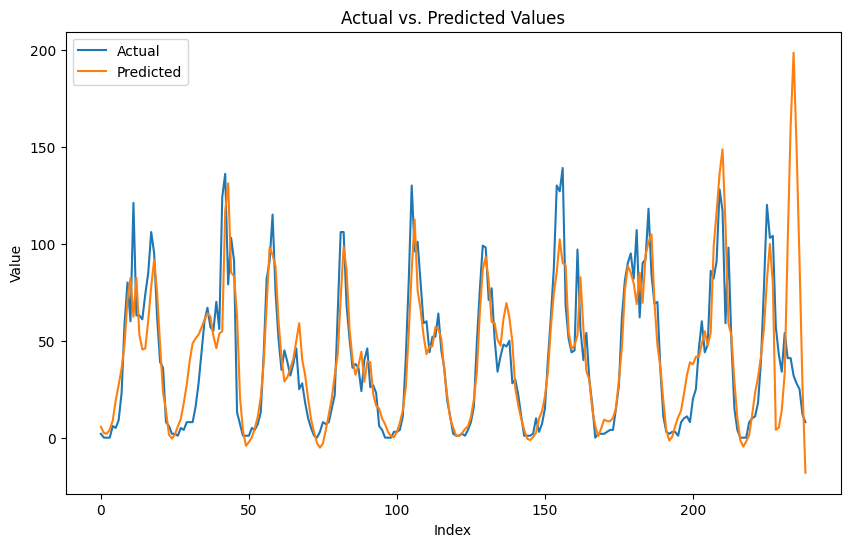

Mean Squared Error: 568.6859079342869
Root Mean Squared Error: 23.847136262752535
Mean Absolute Error: 14.226689392303323
R-squared Score: 0.5768678043014237


In [ ]:
# Get the minimum and maximum values for the target variable ('y')
y_min = scaler.data_min_[0]  # Assuming 'y' is the first column
y_max = scaler.data_max_[0]  # Assuming 'y' is the first column

# Inverse transform predictions to original scale
y_pred_original = y_pred * (y_max - y_min) + y_min
y_pred_original = y_pred_original.flatten()

# Plotting the y_pred_original
plt.figure(figsize=(10, 6))
plt.plot(y_pred_original, marker='o')
plt.title('Line Plot of y_pred_original with 1,8,12 and 24')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred_original, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

mse = mean_squared_error(y_test_original, y_pred_original)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print("Root Mean Squared Error:", rmse)
mae = mean_absolute_error(y_test_original, y_pred_original)
print("Mean Absolute Error:", mae)
r2 = r2_score(y_test_original, y_pred_original)
print("R-squared Score:", r2)

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

def build_lstm_model(units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
    model.add(LSTM(units // 2))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
from scipy.stats import randint, uniform

param_distributions = {
    'units': randint(16, 128),  # Number of LSTM units
    'dropout_rate': uniform(0.2, 0.6)  # Dropout rate
}

In [ ]:
!pip install scikeras


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [ ]:
from sklearn.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

keras_regressor = KerasRegressor(build_lstm_model, verbose=0)

random_search = RandomizedSearchCV(keras_regressor, param_distributions, n_iter=20, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

ModuleNotFoundError: No module named 'sklearn.wrappers'

In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_lstm_model(units=50):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(units=units))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using KerasRegressor
keras_regressor = KerasRegressor(model=build_lstm_model, verbose=0)

# Define the hyperparameters to tune
param_distribs = {
    "model__units": [16, 32, 64, 128],
    "batch_size": [20,32, 50],
    "epochs": [10,20,32,50]}

rnd_search = RandomizedSearchCV(estimator=keras_regressor, param_distributions=param_distribs, n_iter=10, cv=3, verbose=1)

rnd_search.fit(X_train, y_train)

print(rnd_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'model__units': 128, 'epochs': 20, 'batch_size': 32}


In [ ]:
rnd_search

RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(model=<function build_lstm_model at 0x545897310>, verbose=0),
                   param_distributions={'batch_size': [20, 32, 50],
                                        'epochs': [10, 20, 32, 50],
                                        'model__units': [16, 32, 64, 128]},
                   verbose=1)